# <br/><br/>
<center><a style="font-size: 36pt; color: black ; font-weight: bold">ProdigyInfoTech Summer Internship 2024</a></center>
<br/><br/>

TASK#5: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [2]:
#1) Analyze the coumns of dataset

import pandas as pd

df = pd.read_csv("US_Accidents_March23.csv")

print("The dataset is as follows: ")

df.head(10)

The dataset is as follows: 


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Data cleaning and pre processing

import numpy as np

print("The dataset contains the following infomation:")
df.info()

# Check for missing values

print("\nMissing Values:\n", df.isnull().sum())

The dataset contains the following infomation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Ch

In [4]:
# Fill missing values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Print to confirm that numeric columns missing values are filled
print(df.isnull().sum())

# As the output, all numeric columns values are filled by its mean.

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   5
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                   7808
Airport_Code              22635
Weather_Timestamp        120228
Temperature(F)                0
Wind_Chill(F)                 0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction           175206
Wind_Speed(mph)               0
Precipitation(in)             0
Weather_Condition        173459
Amenity                       0
Bump                          0
Crossing

In [7]:
# Now fill non numeric columns missing places by "Unknown" keyword.

df['Description'].fillna('Unknown', inplace=True)
df['Street'].fillna('Unknown', inplace=True)
df['City'].fillna('Unknown', inplace=True)
df['Zipcode'].fillna('Unknown', inplace=True)
df['Timezone'].fillna('Unknown', inplace=True)
df['Airport_Code'].fillna('Unknown', inplace=True)
df['Weather_Timestamp'].fillna('Unknown', inplace=True)
df['Wind_Direction'].fillna('Unknown', inplace=True)
df['Weather_Condition'].fillna('Unknown', inplace=True)
df['Sunrise_Sunset'].fillna('Unknown', inplace=True)
df['Civil_Twilight'].fillna('Unknown', inplace=True)
df['Nautical_Twilight'].fillna('Unknown', inplace=True)
df['Astronomical_Twilight'].fillna('Unknown', inplace=True)

# Print to confirm that all numeric and non numeric columns missing values are filled
print(df.isnull().sum())

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [ ]:
# As per the above output, All missing values are filled.

In [14]:
df["Weather_Condition"]

0          62
1          62
2          88
3          85
4          85
           ..
7728389    16
7728390    16
7728391    91
7728392    16
7728393    16
Name: Weather_Condition, Length: 7728394, dtype: int32

In [23]:
# Drop all rows where no accident found ue to whether_condition

filtered_df = df[df["Weather_Condition"] != 0]

filtered_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,1,3,2,22,39.865147,-84.058723,36.261829,-95.72557,0.010,...,False,False,False,False,False,False,1,1,1,1
1,1111014,1,2,4,1,39.928059,-82.831184,36.261829,-95.72557,0.010,...,False,False,False,False,False,False,1,1,1,0
2,2222108,1,2,6,2,39.063148,-84.032608,36.261829,-95.72557,0.010,...,False,False,False,False,True,False,1,1,0,0
3,3313304,1,3,8,3,39.747753,-84.205582,36.261829,-95.72557,0.010,...,False,False,False,False,False,False,1,0,0,0
4,4416579,1,2,9,4,39.627781,-84.188354,36.261829,-95.72557,0.010,...,False,False,False,False,True,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728200,7481542,0,2,2401147,2396036,34.002480,-117.379360,33.998880,-117.37094,0.543,...,False,False,False,False,False,False,0,0,0,0
7728201,7481543,0,2,2401298,2396265,32.766960,-117.148060,32.765550,-117.15363,0.338,...,False,False,False,False,False,False,0,0,0,0
7728202,7481544,0,2,2401279,2396237,33.775450,-117.847790,33.777400,-117.85727,0.561,...,False,False,False,False,False,False,0,0,0,0
7728203,7481546,0,2,2401279,2396239,33.992460,-118.403020,33.983110,-118.39565,0.772,...,False,False,False,False,False,False,0,0,0,0


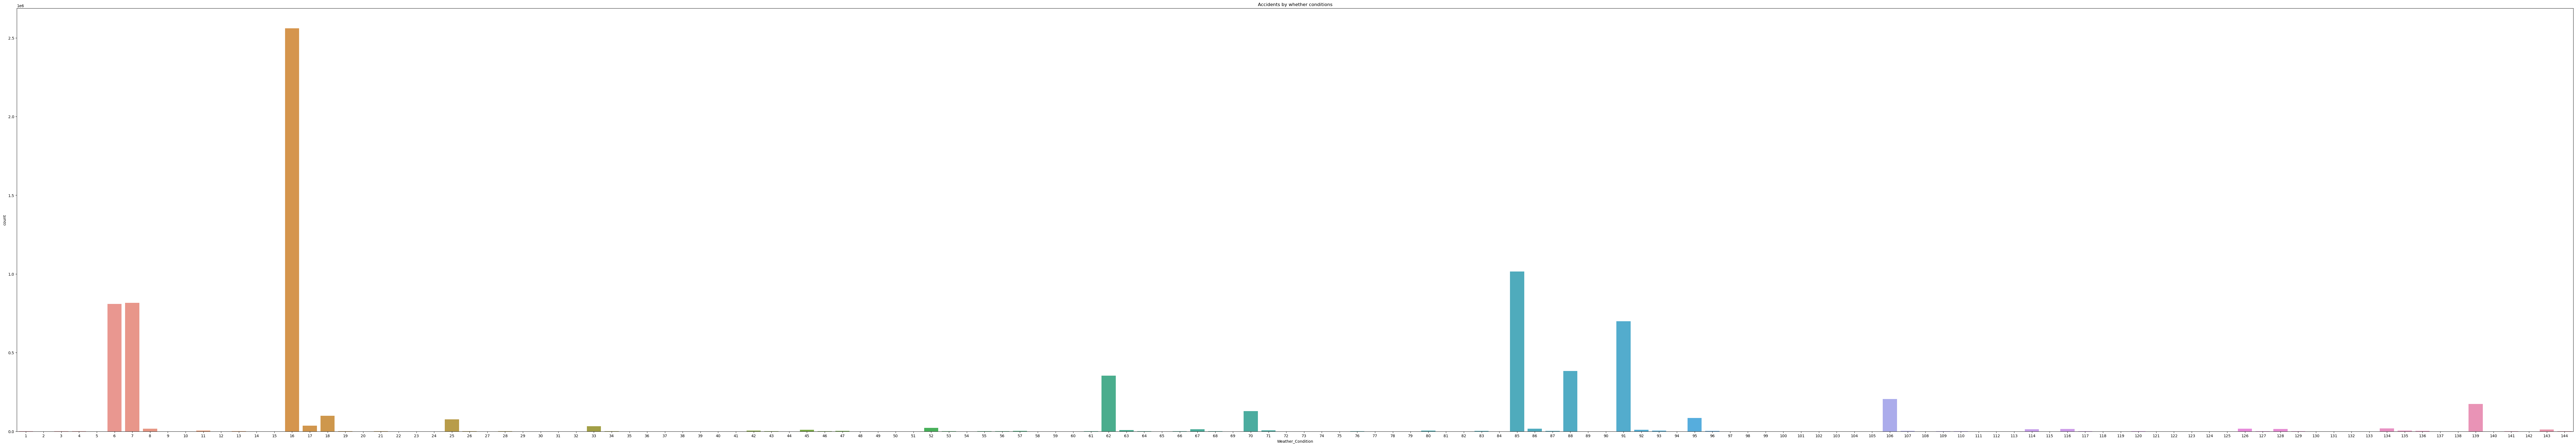

In [35]:
# Data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of accidents by whether conditions
plt.figure(figsize=(120,20))
sns.countplot(data=filtered_df, x= "Weather_Condition")
plt.title("Accidents by whether conditions")
plt.xticks(rotation=0)
plt.show()

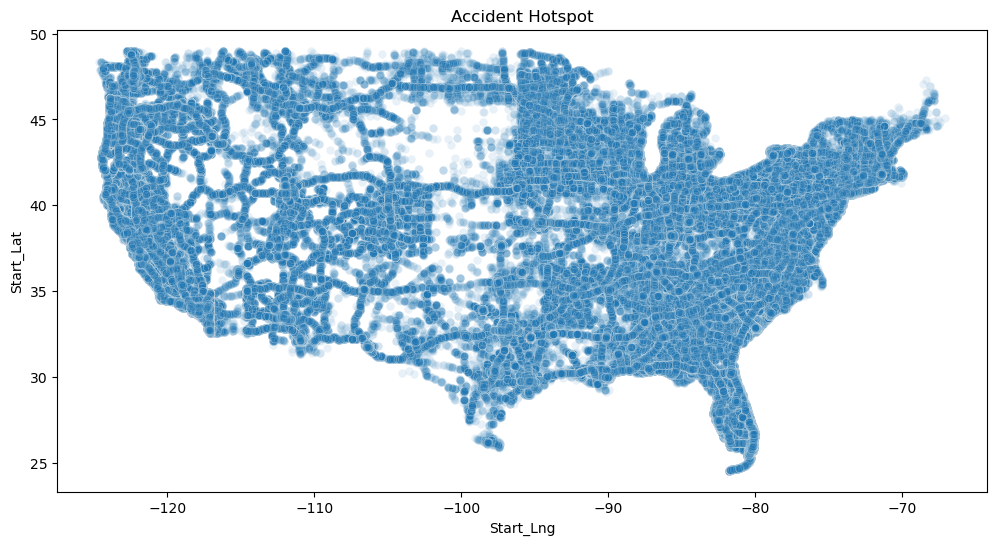

In [39]:
# Identify Accident Hotspots
# Create a heatmap of accident Locations

plt.figure(figsize=(12,6))
sns.scatterplot(data=filtered_df, x= "Start_Lng", y= "Start_Lat", alpha=0.1)
plt.title("Accident Hotspot")
plt.show()

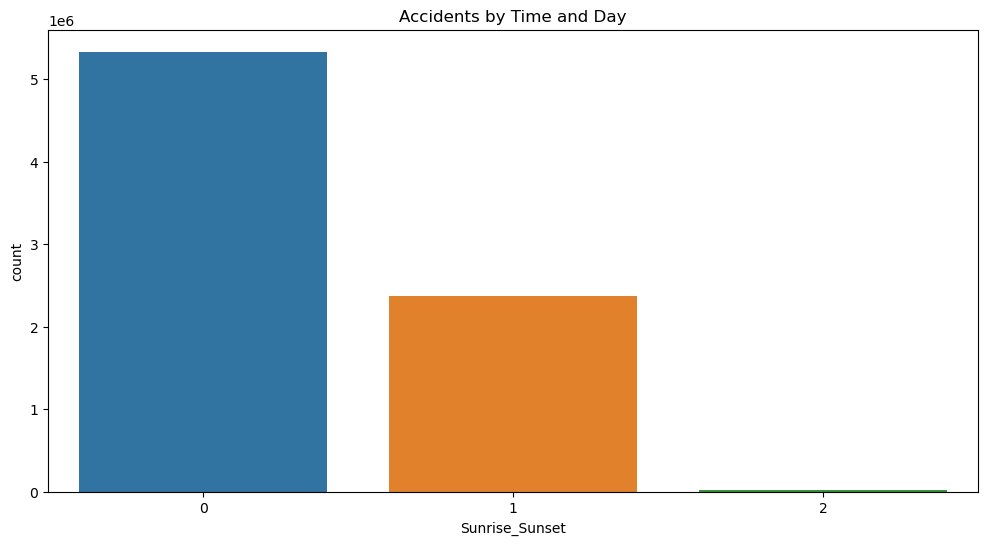

In [40]:
# Analyzing Contributing factor

# Bar plot of accident by time by day
plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, x= "Sunrise_Sunset")
plt.title("Accidents by Time and Day")
plt.xticks(rotation=0)
plt.show()